In [1]:
%matplotlib inline

import numpy as np
import math
from gurobipy import *
import pickle
import matplotlib.pyplot as plt
import time

First preprocess the data and take the max obs for each OD

In [2]:
od_dist = pickle.load(open( "od_dist.p", "rb" ))
record = pickle.load(open( "data/record_total.p", "rb" ))

od_pair_raw = set()
for record_daily in record.values():
    od_pair_raw = od_pair_raw | set(record_daily.keys())
od_pair_raw = list(od_pair_raw)

od_pair = []
for od in od_pair_raw:
    if -1 not in od:
        od_pair += [od]
od_pair = sorted(od_pair)

od_ind = {}
for i,od in enumerate(od_pair):
    od_ind[od] = i
od_matrix = np.zeros((len(record),len(od_pair)))

for i,record_daily in enumerate(record.values()):
    for od,value in record_daily.iteritems():
        j = od_ind.get(od,-1)
        if j >= 0:
            od_matrix[i,j] += value
        
od_matrix = np.max(od_matrix,axis=0)

od_input = {}
for i,od in enumerate(od_pair):
    od_input[od] = od_matrix[i]

Investigate the distribution to decide which OD are the most important and should be kept

(array([  102.,   172.,  1612.,  4242.,  5246.,  7754.,  7394.,  3784.,
          996.,    78.]),
 array([  1.09861229,   2.28889666,   3.47918102,   4.66946539,
          5.85974976,   7.05003413,   8.2403185 ,   9.43060286,
         10.62088723,  11.8111716 ,  13.00145597]),
 <a list of 10 Patch objects>)

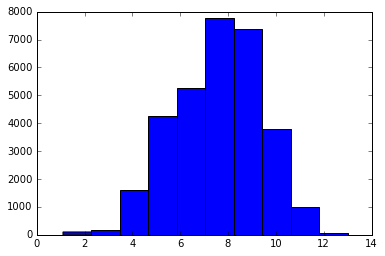

In [3]:
plt.hist(np.log(od_input.values()))